Found 138 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/10
4/4 [==============================] - 8s 919ms/step - loss: 0.7586 - accuracy: 0.5469 - val_loss: 0.7461 - val_accuracy: 0.4688
Epoch 2/10
4/4 [==============================] - 2s 385ms/step - loss: 0.7359 - accuracy: 0.4434 - val_loss: 0.6946 - val_accuracy: 0.5312
Epoch 3/10
4/4 [==============================] - 2s 414ms/step - loss: 0.7031 - accuracy: 0.5283 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 2s 410ms/step - loss: 0.6883 - accuracy: 0.5189 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 5/10
4/4 [==============================] - 2s 494ms/step - loss: 0.7013 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5312
Epoch 6/10
4/4 [==============================] - 2s 544ms/step - loss: 0.6936 - accuracy: 0.4057 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 2s 569ms/step - loss: 0.7021 

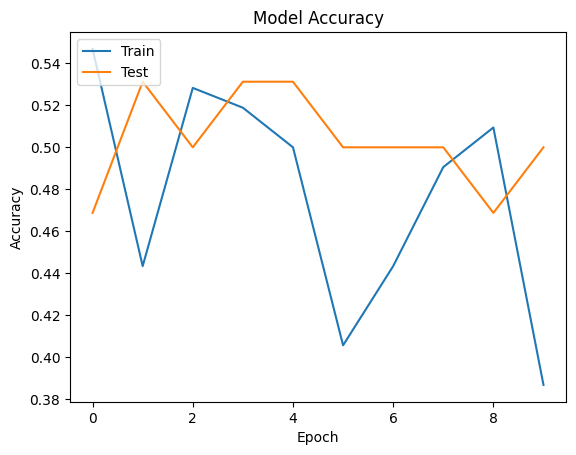

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_16[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape of your images
input_shape = (224, 224, 3)  # Adjust the dimensions based on your images

# Set the number of classes
num_classes = 2  # Two classes: hearing impaired and healthy

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the paths to your dataset
train_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\training'
test_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\testing'

# Set the batch size and number of training epochs
batch_size = 32
epochs = 10

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model and store the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Calculate the average accuracy
avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])
print('Average accuracy:', avg_accuracy)

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()


Found 138 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
4/4 [==============================] - 8s 854ms/step - loss: 0.7696 - accuracy: 0.5000 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 2s 343ms/step - loss: 0.7313 - accuracy: 0.5189 - val_loss: 0.7632 - val_accuracy: 0.4688
Epoch 3/20
4/4 [==============================] - 2s 399ms/step - loss: 0.7389 - accuracy: 0.4623 - val_loss: 0.6945 - val_accuracy: 0.5312
Epoch 4/20
4/4 [==============================] - 2s 397ms/step - loss: 0.6849 - accuracy: 0.5566 - val_loss: 0.7085 - val_accuracy: 0.4688
Epoch 5/20
4/4 [==============================] - 2s 518ms/step - loss: 0.7047 - accuracy: 0.4906 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 2s 509ms/step - loss: 0.6944 - accuracy: 0.5156 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 2s 435ms/step - loss: 0.6945 

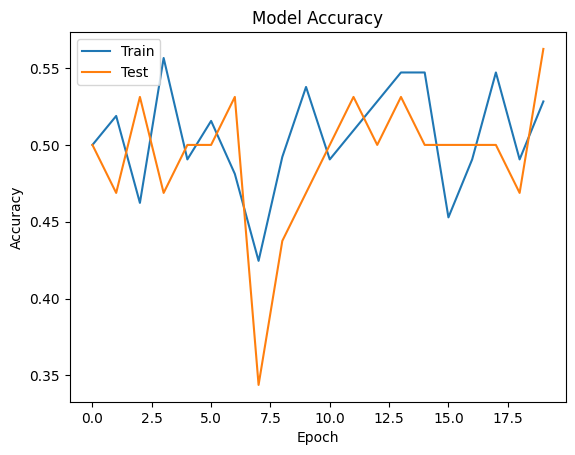

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [47]:
# modifications to help improve accuracy:
# The modifications include:

# Increasing the number of units in the Dense layer after the GlobalAveragePooling2D layer to 512.
# Lowering the learning rate to 0.0001 to potentially help the model converge better.
# Increasing the number of training epochs to 20 to allow the model to train for a longer duration.
# Increasing the range of rotation in the data augmentation settings to 20 for more diverse augmentations.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape of your images
input_shape = (224, 224, 3)  # Adjust the dimensions based on your images

# Set the number of classes
num_classes = 2  # Two classes: hearing impaired and healthy

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Increase the number of units in the Dense layer
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),  # Adjust the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the paths to your dataset
train_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\training'
test_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\testing'

# Set the batch size and number of training epochs
batch_size = 32
epochs = 20  # Increase the number of epochs

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Increase the rotation range for more diverse augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model and store the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Calculate the average accuracy
avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])
print('Average accuracy:', avg_accuracy)

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()


Found 138 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/75
9/9 [==============================] - 8s 354ms/step - loss: 0.7880 - accuracy: 0.4797 - val_loss: 0.7036 - val_accuracy: 0.5333
Epoch 2/75
9/9 [==============================] - 2s 183ms/step - loss: 0.7014 - accuracy: 0.4878 - val_loss: 0.6946 - val_accuracy: 0.5333
Epoch 3/75
9/9 [==============================] - 2s 185ms/step - loss: 0.6986 - accuracy: 0.5203 - val_loss: 0.6903 - val_accuracy: 0.5333
Epoch 4/75
9/9 [==============================] - 2s 181ms/step - loss: 0.6999 - accuracy: 0.4065 - val_loss: 0.6907 - val_accuracy: 0.5333
Epoch 5/75
9/9 [==============================] - 2s 187ms/step - loss: 0.7277 - accuracy: 0.5203 - val_loss: 0.7112 - val_accuracy: 0.4667
Epoch 6/75
9/9 [==============================] - 2s 182ms/step - loss: 0.6926 - accuracy: 0.5122 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 7/75
9/9 [==============================] - 2s 187ms/step - loss: 0.6998 

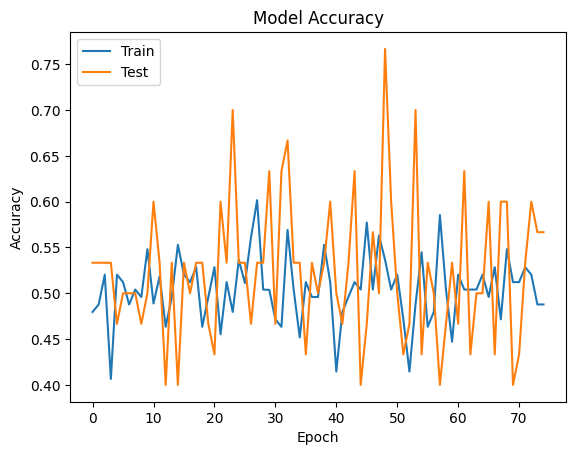

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [46]:
# modifications to help improve accuracy:
# The modifications include:

# Increasing the number of units in the Dense layer after the GlobalAveragePooling2D layer to 512.
# Lowering the learning rate to 0.0001 to potentially help the model converge better.
# Increasing the number of training epochs to 20 to allow the model to train for a longer duration.
# Increasing the range of rotation in the data augmentation settings to 20 for more diverse augmentations.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the input shape of your images
input_shape = (224, 224, 3)  # Adjust the dimensions based on your images

# Set the number of classes
num_classes = 2  # Two classes: hearing impaired and healthy

# Load the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Add a custom classification head on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Increase the number of units in the Dense layer
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),  # Adjust the learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define the paths to your dataset
train_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\training'
test_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset\\testing'

# Set the batch size and number of training epochs
batch_size = 15
epochs = 75  # Increase the number of epochs

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Increase the rotation range for more diverse augmentations
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and testing data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Train the model and store the training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Calculate the average accuracy
avg_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])
print('Average accuracy:', avg_accuracy)

# Plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

model.summary()


In [4]:
# code for cropping all the images so they're normalized to 224 x 224

from PIL import Image
import os

# Define the paths to the folders that need cropping
folders = [
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Hearing Impaired'
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Healthy',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Hearimg Impaired',
r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Hearing Impaired',
r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Not Hearing Impaired'
]

# Iterate over the specified folders
for folder in folders:
    # Iterate over the files in the folder
    for file in os.listdir(folder):
        # Check if the file is an image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Construct the full file path
            file_path = os.path.join(folder, file)

            # Open the image using PIL
            image = Image.open(file_path)

            # Get the dimensions of the image
            width, height = image.size

            # These are the parameters below for cropping each image
            size = 490
            left = 160  # Modify this value to adjust the leftmost position of the crop
            right = left + size  # Keep the rightmost position as the size of the square
            top = 73
            bottom = top + size

            # Crop the image to the center square
            cropped_image = image.crop((left, top, right, bottom))

            # Resize the image to (224, 224)
            resized_image = cropped_image.resize((224, 224))

            # Replace the original image with the cropped and resized image
            resized_image.save(file_path)


In [31]:
# this script changes the structure of the folders that contain testing and training data so that the images are separated by 
# hearing impaired and healthy groups. so we just swapped the order of the classes and components

import os
import shutil


original_dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\dataset'
new_dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\new dataset'

# Define the class names
class_names = ['Healthy', 'Hearing impaired']

# Define the component names
component_names = ['N1', 'N2', 'P1', 'P2', 'P3']

# Define the percentage split for training and testing data
train_percentage = 0.8
test_percentage = 0.2

# Create the train and test directories in the new dataset folder
os.makedirs(os.path.join(new_dataset_path, 'training'), exist_ok=True)
os.makedirs(os.path.join(new_dataset_path, 'testing'), exist_ok=True)

# Loop over the class names
for class_name in class_names:
    for component_name in component_names:
        class_component_dir = os.path.join(original_dataset_path, 'training', component_name, class_name)
        train_class_component_dir = os.path.join(new_dataset_path, 'training', class_name, component_name)
        test_class_component_dir = os.path.join(new_dataset_path, 'testing', class_name, component_name)

        # Create the train and test class component directories
        os.makedirs(train_class_component_dir, exist_ok=True)
        os.makedirs(test_class_component_dir, exist_ok=True)

        # Get the list of images in the class component directory
        images = os.listdir(class_component_dir)

        # Determine the number of images for training and testing
        num_images = len(images)
        num_train_images = int(num_images * train_percentage)
        num_test_images = num_images - num_train_images

        # Split the images into training and testing sets
        train_images = images[:num_train_images]
        test_images = images[num_train_images:]

        # Copy the training images to the destination directory
        for image in train_images:
            src_path = os.path.join(class_component_dir, image)
            dest_path = os.path.join(train_class_component_dir, image)
            shutil.copy(src_path, dest_path)

        # Copy the testing images to the destination directory
        for image in test_images:
            src_path = os.path.join(class_component_dir, image)
            dest_path = os.path.join(test_class_component_dir, image)
            shutil.copy(src_path, dest_path)
